## Data Load

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px

import json
import missingno as msno

import warnings
warnings.simplefilter("ignore")

In [580]:
df = pd.read_csv('C:/Users/user/1/Downloads/dataset_for_datascience_assignment.csv')
pd.set_option('display.max_columns', None)
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [581]:
df.set_index('USER_ID', inplace=True)

In [582]:
df.shape

(21983, 29)

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 1 to 21983
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   BREAKFAST_PURCHASES                      12028 non-null  float64
 8   LUNCH_PURCHASES                          12028 non-null  float64
 9   EVENING_PURCHASES                        12028 non-null  float64
 10  DINNER_PURCHASES                         12028

## Data Cleaning

In [584]:
df['PURCHASE_COUNT_BY_STORE_TYPE'].values

array(['{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 1,\n  "Grocery": 9,\n  "Pet supplies": 0,\n  "Restaurant": 9,\n  "Retail store": 0\n}',
       ...,
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}'],
      dtype=object)

The column `PURCHASE_COUNT_BY_STORE_TYPE` needs to expand in order to create five new columns that represent the respective store type

In [585]:
df['PURCHASE_COUNT_BY_STORE_TYPE'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: json.loads(x.replace('\n', '').replace(' ', '')))

expanded_df = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(pd.Series)
df = pd.concat([df, expanded_df], axis=1)

df.drop('PURCHASE_COUNT_BY_STORE_TYPE', axis=1, inplace=True)
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [586]:
# We will turn the following variables into their appropriate data type (datetime)
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

# MOST_COMMON_WEEKDAY_TO_PURCHASE - ENCODING
weekday_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].map(weekday_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 1 to 21983
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   BREAKFAST_PURCHASES                      12028 non-null  float64       
 8   LUNCH_PURCHASES                          12028 non-null  float64       
 9   EVENING_PURCHASES                      

In [587]:
df.isnull().sum()

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES                               9955
ANDROID_PURCHASES   

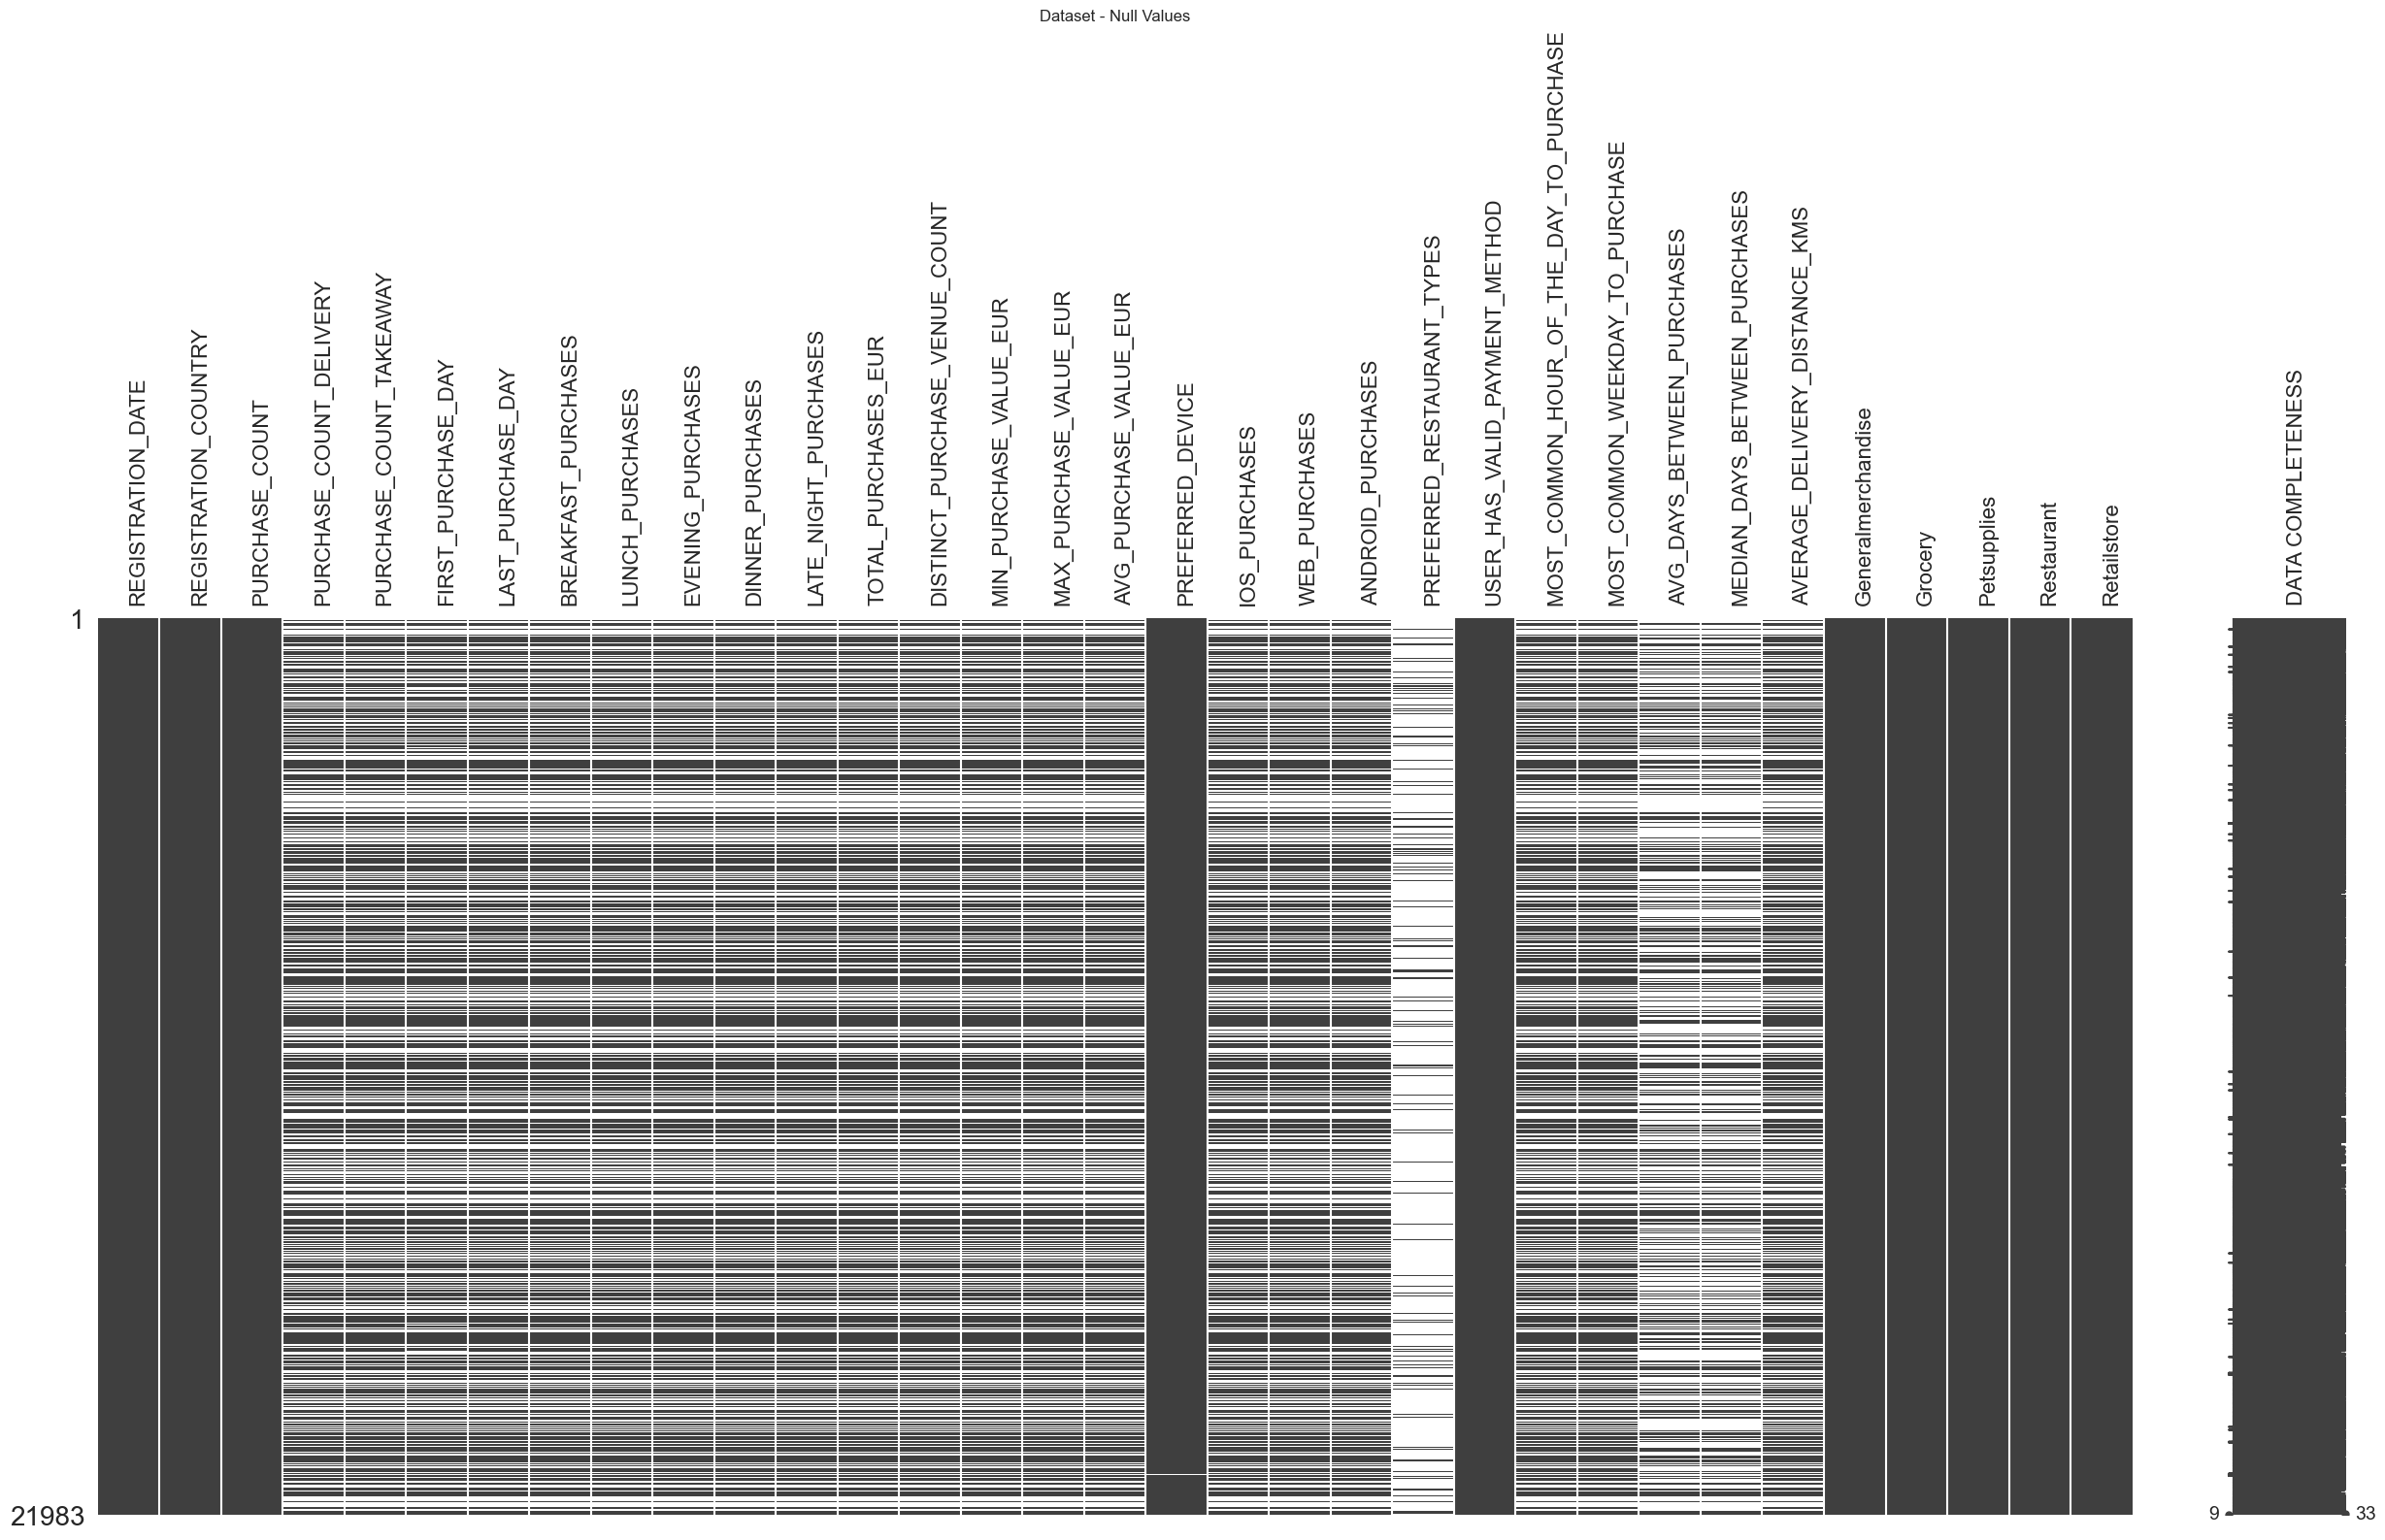

In [588]:
msno.matrix(df, labels=True, figsize=(30,12), label_rotation=90)
plt.title('Dataset - Null Values')
plt.show()

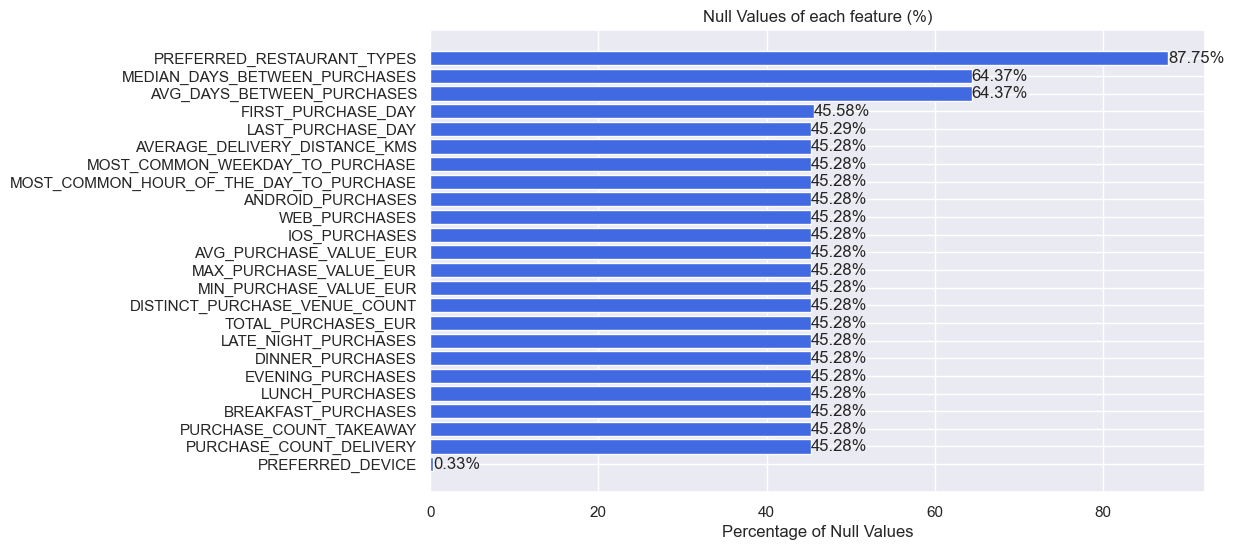

In [589]:
null_percentage = {}
for col in df.columns:
    sum_null = df[col].isnull().sum()
    sum_null_perc = 100 * sum_null / df.shape[0]
    if sum_null_perc != 0:
        null_percentage[col] = round(sum_null_perc, 2)
    else:
        continue

sorted_null_percentage = {k: v for k, v in sorted(null_percentage.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_null_percentage)), list(sorted_null_percentage.values()), align='center', color='royalblue')

plt.yticks(range(len(sorted_null_percentage)), list(sorted_null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(sorted_null_percentage.values())[i]}%', va='center', ha='left')

plt.show()


As we take a first look at the data we observe that there are a lot of NaN values. However, we can notice that customers who have PURCHASE_COUNT equal to zero, which means that they have not completed an order, is the reason why the majority of NaN values exist.  
Consequently, we conclude that the majority of these NaN values is due to these members.

In [590]:
df[df['PURCHASE_COUNT']!=0].isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                           64
LAST_PURCHASE_DAY                             1
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              1
IOS_PURCHASES                                 0
WEB_PURCHASES                                 0
ANDROID_PURCHASES                       

Now, it's clear that NaN values have disappeared in most of our features, except `PREFERRED_RESTAURANT_TYPES`, `AVG_DAYS_BETWEEN_PURCHASES` & `MEDIAN_DAYS_BETWEEN_PURCHASES` which is still a significant number.

### `PREFERRED_RESTAURANT_TYPE` - DATA CLEANING

In [591]:
# PREFERRED_RESTAURANT_TYPE
pd.set_option('display.max_rows', None)
df['PREFERRED_RESTAURANT_TYPES'].value_counts()

[\n  "american"\n]                                                                                   658
[\n  "japanese"\n]                                                                                   367
[\n  "italian"\n]                                                                                    345
[\n  "mexican"\n]                                                                                    175
[\n  "american",\n  "italian"\n]                                                                     131
[\n  "indian"\n]                                                                                     111
[\n  "american",\n  "italian",\n  "mexican"\n]                                                        62
[\n  "middle eastern"\n]                                                                              58
[\n  "italian",\n  "american"\n]                                                                      51
[\n  "american",\n  "japanese"\n]                      

The 87.75% of the column PREFERRED_RESTAURANT_TYPE contains NaN values. If we exclude the customers that have never ordered from Wolt the 77.84% of the active members have not expressed their preferred cuisine. That's why we will convert the column into a binary variable ('Yes'/'No' values) which will represent if a customer has a preferred restaurant type.  
In other words, all NaN values will take the label 'No' and the rest of customers the label 'Yes'.

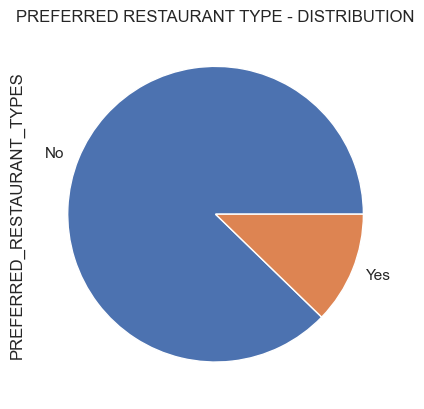

In [592]:
df['PREFERRED_RESTAURANT_TYPES'] = df['PREFERRED_RESTAURANT_TYPES'].fillna('No')
df['PREFERRED_RESTAURANT_TYPES'] = np.where(df['PREFERRED_RESTAURANT_TYPES']=='No', 'No', 'Yes')
df['PREFERRED_RESTAURANT_TYPES'].value_counts().plot.pie()
plt.title('PREFERRED RESTAURANT TYPE - DISTRIBUTION')
plt.show()

### `AVG_DAYS_BETWEEN_PURCHASES` - DATA CLEANING  
This metric measures the average days between 2 orders. For example if a user make 1 order every 7 days, the value of this feature will be 7. However, inactive users have never purchased anything, so it will be meaningful to replace NaN to those users. Same case with the active users who have completed exactly one purchase.  

Consequently, **we will keep NaN values to those users**.

In [593]:
a = df[df['PURCHASE_COUNT']==1].shape[0]
b = df[df['PURCHASE_COUNT']!=0]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum()
c = df[df['PURCHASE_COUNT']!=0]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum()

d = b-a
e = c-a
print(f'Users with exactly one purchase:  {a}')
print(f'Active Members with NaN in the column "AVG_DAYS_BETWEEN_PURCHASES" {b}')
print(f'Active Members with NaN in the column "MEDIAN_DAYS_BETWEEN_PURCHASES" {c}')

print("")
print(f"Expected NaN values that we should replace in the column 'AVG_DAYS_BETWEEN_PURCHASES': {d}")
print(f"Expected NaN values that we should replace in the column 'MEDIAN_DAYS_BETWEEN_PURCHASES': {e}")

Users with exactly one purchase:  4179
Active Members with NaN in the column "AVG_DAYS_BETWEEN_PURCHASES" 4196
Active Members with NaN in the column "MEDIAN_DAYS_BETWEEN_PURCHASES" 4196

Expected NaN values that we should replace in the column 'AVG_DAYS_BETWEEN_PURCHASES': 17
Expected NaN values that we should replace in the column 'MEDIAN_DAYS_BETWEEN_PURCHASES': 17


In [594]:
print(df[df['PURCHASE_COUNT']>1]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum())
print(df[df['PURCHASE_COUNT']>1]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum())

17
17


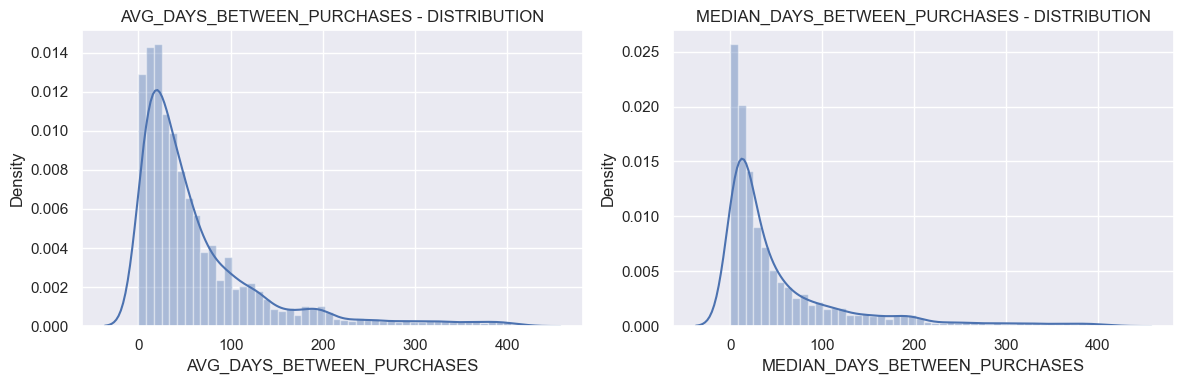

In [595]:
# MEDIAN_DAYS_BETWEEN_PURCHASES
# AVG_DAYS_BETWEEN_PURCHASES

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['AVG_DAYS_BETWEEN_PURCHASES'])
plt.title('AVG_DAYS_BETWEEN_PURCHASES - DISTRIBUTION')
plt.subplot(1,2,2)
sns.distplot(df['MEDIAN_DAYS_BETWEEN_PURCHASES'])
plt.title('MEDIAN_DAYS_BETWEEN_PURCHASES - DISTRIBUTION')
plt.tight_layout()
plt.show()

Since the distribution of these 2 continuous variables have a positive skewness, we will replace those 17 NaN values with the median of the respective feature.

In [596]:
data = df['PURCHASE_COUNT'] > 1

df.loc[data, 'AVG_DAYS_BETWEEN_PURCHASES'] = df.loc[data, 'AVG_DAYS_BETWEEN_PURCHASES'].fillna(
    df['AVG_DAYS_BETWEEN_PURCHASES'].median())

df.loc[data, 'MEDIAN_DAYS_BETWEEN_PURCHASES'] = df.loc[data, 'MEDIAN_DAYS_BETWEEN_PURCHASES'].fillna(
    df['MEDIAN_DAYS_BETWEEN_PURCHASES'].median())

In [597]:
print(df[df['PURCHASE_COUNT']>1]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum())
print(df[df['PURCHASE_COUNT']>1]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum())

0
0


### `FIRST_PURCHASE_DAY`, `LAST_PURCHASE_DAY`, & `PREFERRED_DEVICE` - DATA CLEANING

In [598]:
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['FIRST_PURCHASE_DAY'].isna())].index, inplace=True)
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['LAST_PURCHASE_DAY'].isna())].index, inplace=True)
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['PREFERRED_DEVICE'].isna())].index, inplace=True)

print(df.shape)
df.head()

(21918, 33)


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,No,False,23.0,Tuesday,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,No,True,21.0,Tuesday,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


### Active Vs Inactive Users

In [599]:
inactive_members = df[df['PURCHASE_COUNT']==0]
active_members = df[df['PURCHASE_COUNT']!=0]

print(f'Number of members with 0 orders: {inactive_members.shape[0]}')
print(f'Number of members with at least 1 order: {active_members.shape[0]}')

Number of members with 0 orders: 9955
Number of members with at least 1 order: 11963


In [600]:
active_members.isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                            0
LAST_PURCHASE_DAY                             0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              0
IOS_PURCHASES                                 0
WEB_PURCHASES                                 0
ANDROID_PURCHASES                       

As we see, we have completed NaN handling in almost all our features of the dataset, except of the (average/median) days between purchases. These NaN values represent the users who have completed a purchase exactly once.

## Exploratory Data Analysis

In [601]:
df.nunique()

REGISTRATION_DATE                            30
REGISTRATION_COUNTRY                         59
PURCHASE_COUNT                              107
PURCHASE_COUNT_DELIVERY                     106
PURCHASE_COUNT_TAKEAWAY                      26
FIRST_PURCHASE_DAY                          426
LAST_PURCHASE_DAY                           427
BREAKFAST_PURCHASES                          22
LUNCH_PURCHASES                              67
EVENING_PURCHASES                            31
DINNER_PURCHASES                             57
LATE_NIGHT_PURCHASES                          1
TOTAL_PURCHASES_EUR                        1087
DISTINCT_PURCHASE_VENUE_COUNT                40
MIN_PURCHASE_VALUE_EUR                      152
MAX_PURCHASE_VALUE_EUR                      223
AVG_PURCHASE_VALUE_EUR                      167
PREFERRED_DEVICE                              3
IOS_PURCHASES                                79
WEB_PURCHASES                                65
ANDROID_PURCHASES                       

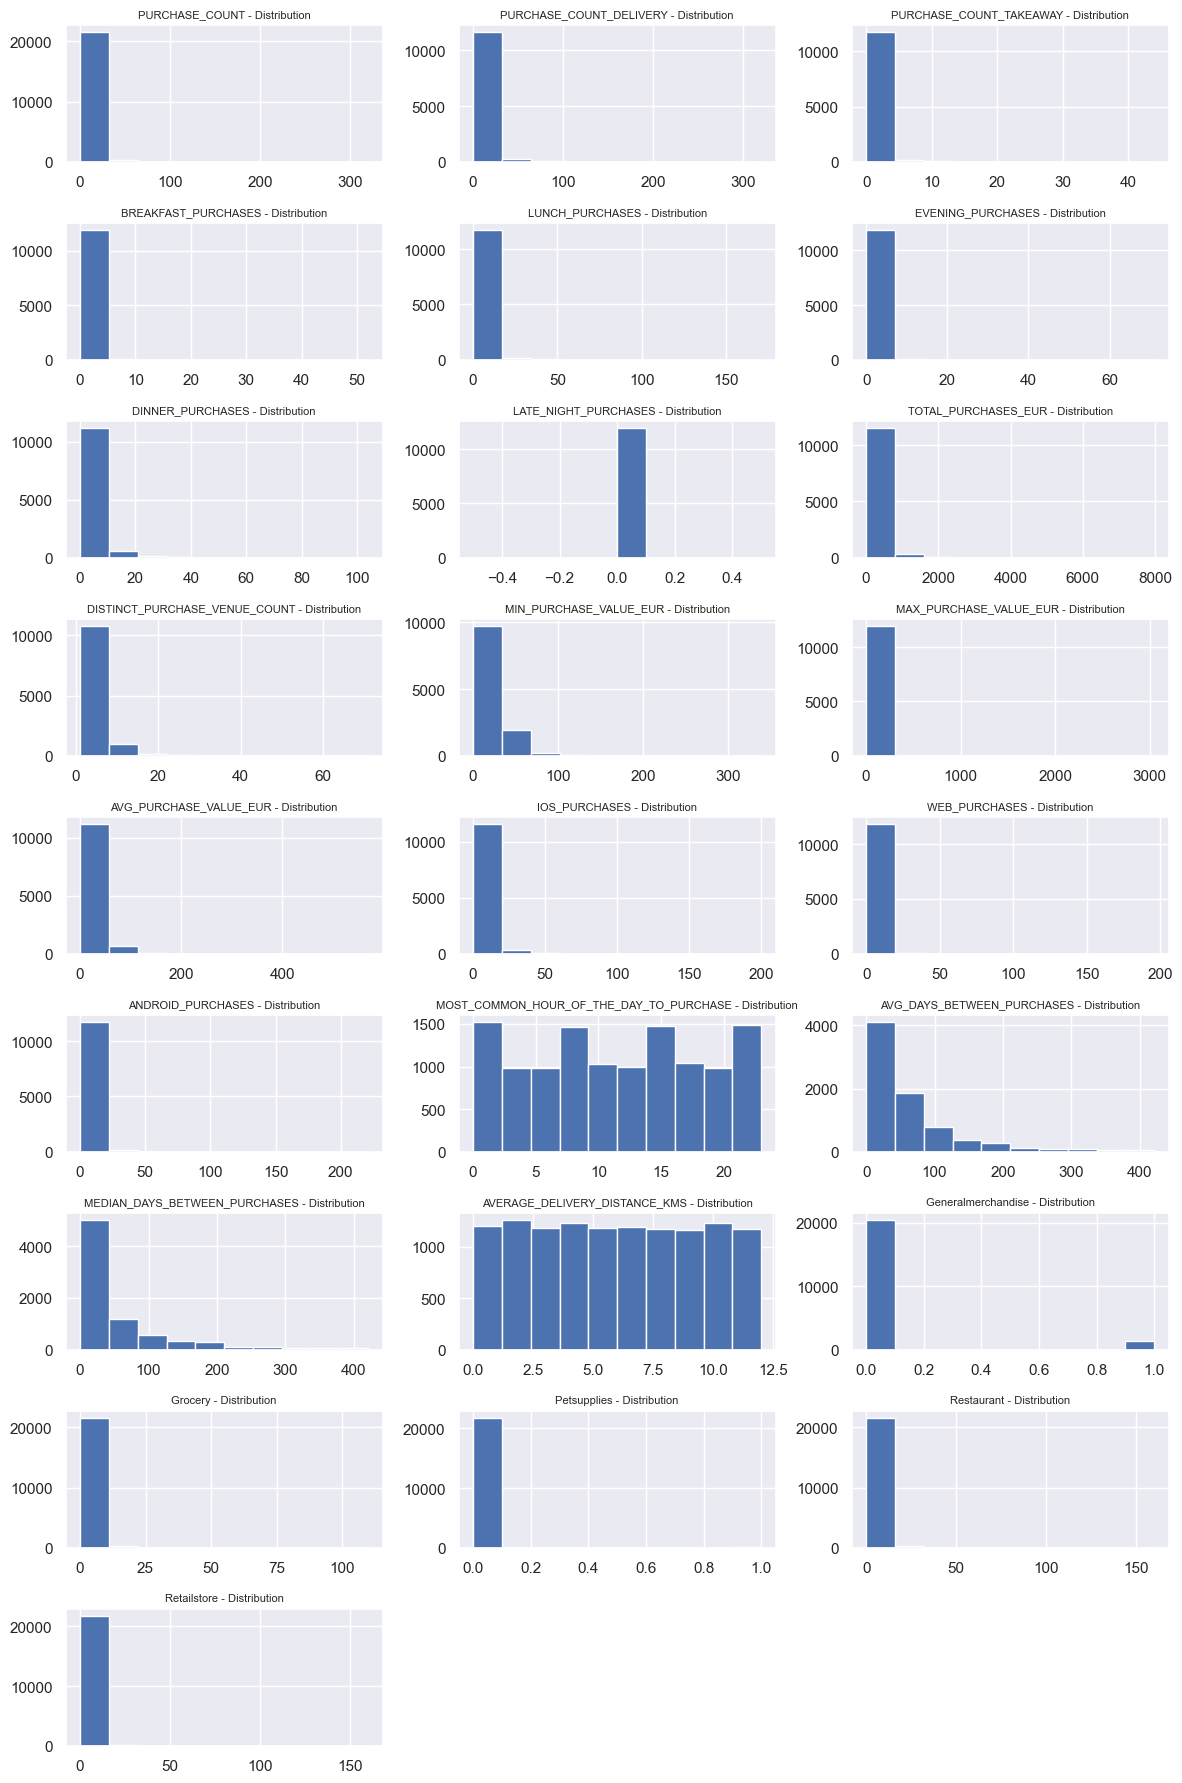

In [602]:
numeric = df.select_dtypes(include=['float', 'int']).columns

plt.figure(figsize=(12,18))
for i, col in enumerate(numeric, 1):
    plt.subplot(9,3,i)
    plt.hist(df[col])
    plt.title(f'{col} - Distribution', fontsize=8)

plt.tight_layout()
plt.show()

Almost every numeric variable in the dataset includes extreme values (outliers). 

In [603]:
# LATE_NIGHT_PURCHASES
print(df['LATE_NIGHT_PURCHASES'].value_counts())
# Since no one has ever completed a late night purchase we will drop this variable because it doesn't give us any information.
df.drop('LATE_NIGHT_PURCHASES', axis=1, inplace=True)

0.0    11963
Name: LATE_NIGHT_PURCHASES, dtype: int64


### INSIDE THE DATA

In [604]:
# REGISTRATION_DATE
df.REGISTRATION_DATE.describe()

count                   21918
unique                     30
top       2019-09-07 00:00:00
freq                     1227
first     2019-09-01 00:00:00
last      2019-09-30 00:00:00
Name: REGISTRATION_DATE, dtype: object

The dataset contains all Wolt's registrations of September 2019 (2019-09-01 to 2019-09-30).

### 1. What's the total number of purchases during that period? 

In [605]:
# TOTAL PURCHASES
total_purchases = df['PURCHASE_COUNT'].sum()
print(f"Total number of purchases across all users: {total_purchases:,}")

Total number of purchases across all users: 73,351


### 2. What's the total income Wolt had during September 2019? 

In [606]:
# TOTAL_PURCHASES_EUR
total_income = df['TOTAL_PURCHASES_EUR'].sum()
print(f'Total Income in September: ${total_income:,}')

Total Income in September: $2,111,295.12


### 3. How many Wolt's members made at least one order?

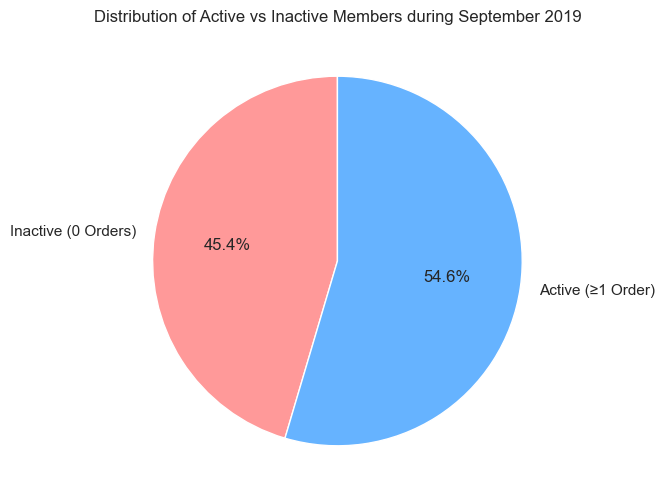

In [607]:
sizes = [inactive_members.shape[0], active_members.shape[0]]
labels = ['Inactive (0 Orders)', 'Active (≥1 Order)']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Active vs Inactive Members during September 2019')
plt.show()

### 4. How the number of orders is distributed ? 

In [608]:
# How the amount of purchases is distributed ? 
df['PURCHASE_COUNT'].value_counts()

0      9955
1      4149
2      1809
3      1136
4       833
5       567
6       474
7       380
8       309
9       267
10      205
11      184
12      140
13      140
14      116
15      104
16       87
17       86
18       80
20       76
19       70
21       62
23       54
22       53
25       41
26       37
28       35
30       33
24       31
31       31
29       26
27       26
32       22
38       21
36       19
34       17
37       17
40       16
35       13
39       13
43       12
46       11
47       10
33       10
54        9
44        8
45        8
57        7
41        6
51        6
52        5
49        5
64        3
55        3
42        3
76        3
96        3
74        3
70        3
60        3
59        3
72        3
56        2
78        2
50        2
73        2
62        2
58        2
87        2
53        2
94        2
69        2
65        2
48        2
63        1
144       1
91        1
111       1
99        1
80        1
79        1
89        1
83        1
82  

As we see the majority of users don't surpass 3 purchases. Let's see more deeply...

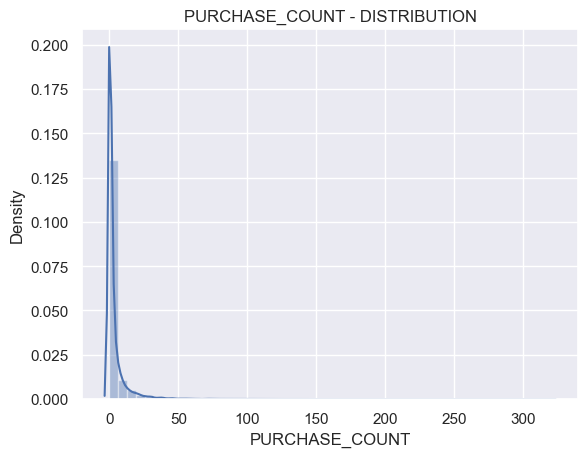


75% of customers have made no more than 3.0 purchases


count    21918.000000
mean         3.346610
std          8.533522
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        320.000000
Name: PURCHASE_COUNT, dtype: float64

In [609]:
sns.distplot(df['PURCHASE_COUNT'])
plt.title('PURCHASE_COUNT - DISTRIBUTION')
plt.show()

print("")
third_quarter = df['PURCHASE_COUNT'].quantile(0.75)
print(f'75% of customers have made no more than {third_quarter:.1f} purchases')

df['PURCHASE_COUNT'].describe()

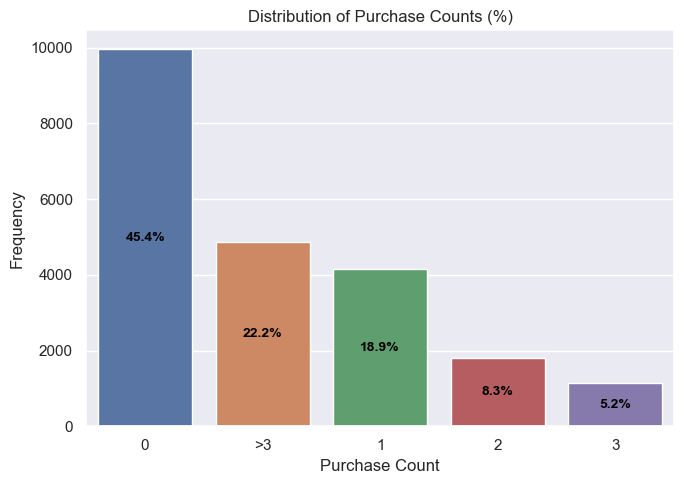

In [610]:
df_new = df.copy()
df_new['PURCHASE_COUNT'] = np.where(df['PURCHASE_COUNT'] <= 3, df['PURCHASE_COUNT'], '>3')

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_new, x='PURCHASE_COUNT', order=df_new['PURCHASE_COUNT'].value_counts().index)

total = len(df_new)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., height * 0.5),  # halfway up the bar
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')

plt.title('Distribution of Purchase Counts (%)')
plt.xlabel('Purchase Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 5. What's the average total spend per user? 
- `TOTAL_PURCHASES_EUR` shows the total amount of money spent by a customer across all purchases.
- The sum of this column shows the total income of Wolt in September. 
As we saw before, Wolt had an income of $2,111,295.12. 
- The mean of this column shows average Wolt's income by a useer.

In [611]:
avg_total_spend_per_user = df['TOTAL_PURCHASES_EUR'].mean()
print(f"Average total purchase value per user: €{avg_total_spend_per_user:.2f}")

Average total purchase value per user: €176.49


### 6. What's the average total spend per purchase? 
- `AVG_PURCHASES_VALUE_EUR` shows the average amount of money spent by a customer per purchase
- The mean of this feature shows the average amount of money spent for a purchase

In [612]:
avg_spend_per_purchase = df['AVG_PURCHASE_VALUE_EUR'].mean()
print(f'Average cost for a purchase: €{avg_spend_per_purchase:.2f}')

Average cost for a purchase: €31.10


### 7. What's the most common weekday to order?

Sunday       1775
Thursday     1763
Tuesday      1743
Monday       1709
Saturday     1683
Friday       1674
Wednesday    1616
Name: MOST_COMMON_WEEKDAY_TO_PURCHASE, dtype: int64



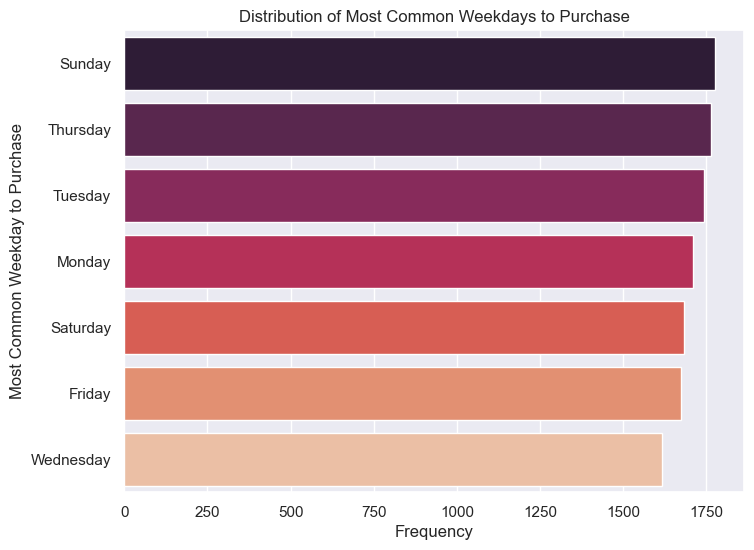


If we assume that Monday is the first day of the week, then we observe that Sunday is the most common day to order from Wolt with [1775] total orders!
On the other hand, Wednesday is the least common day with 1616 total orders.


In [613]:
print(df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts())
print("")

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='MOST_COMMON_WEEKDAY_TO_PURCHASE', order=df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().index, palette='rocket')

plt.title('Distribution of Most Common Weekdays to Purchase')
plt.xlabel('Frequency')
plt.ylabel('Most Common Weekday to Purchase')
plt.show()

number_of_orders = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_values(ascending=False).head(1).values
print("")

# MOST_COMMON_WEEKDAY_TO_PURCHASE is coded from 1 to 7 that represent the respective day of the week 
print(f"If we assume that Monday is the first day of the week, then we observe that Sunday is the most common day to order from Wolt with {number_of_orders} total orders!")
print("On the other hand, Wednesday is the least common day with 1616 total orders.")

### 8. What's the most common hour to order?

18.0    539
2.0     522
10.0    516
1.0     515
12.0    514
11.0    513
4.0     509
16.0    507
23.0    506
17.0    506
22.0    496
19.0    494
7.0     492
5.0     492
14.0    492
6.0     490
20.0    488
0.0     488
9.0     486
21.0    484
8.0     482
13.0    478
3.0     477
15.0    477
Name: MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, dtype: int64



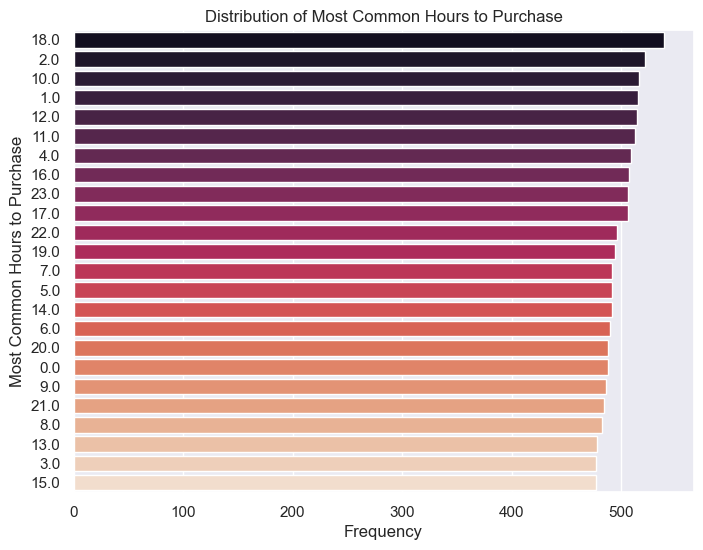

In [614]:
print(df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts())
print("")

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', order=df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().index, palette='rocket')

plt.title('Distribution of Most Common Hours to Purchase')
plt.xlabel('Frequency')
plt.ylabel('Most Common Hours to Purchase')
plt.show()

#### Let's combine the last 2 insights into one powerful heatmap to see the day and the hour of the week that user's activity gets increased

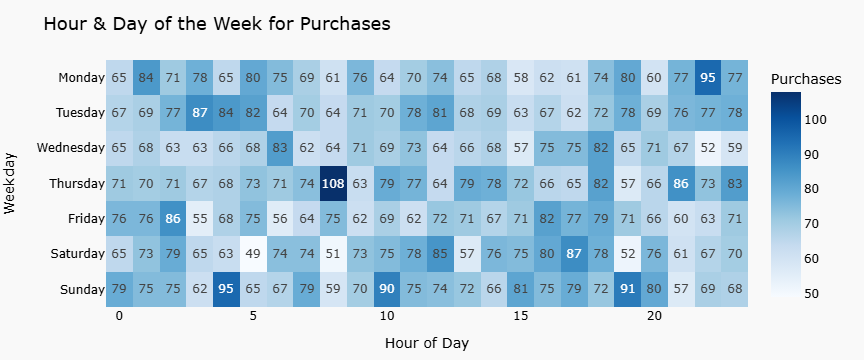

In [615]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hour_day_pivot = df.groupby(['MOST_COMMON_WEEKDAY_TO_PURCHASE', 
                             'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE']).size().unstack(fill_value=0)

hour_day_pivot = hour_day_pivot.reindex(weekday_order)

fig = px.imshow(hour_day_pivot,
                labels=dict(x="Hour of Day", y="Weekday", color="Purchases"),
                x=hour_day_pivot.columns,
                y=hour_day_pivot.index,
                color_continuous_scale='Blues',
                text_auto=True)

fig.update_layout(
    title='Hour & Day of the Week for Purchases',
    plot_bgcolor='white',         
    paper_bgcolor='#f9f9f9',      
    font=dict(color='black'),    
    title_font_size=18,
    margin=dict(t=60, b=40, l=60, r=40)
)

fig.show()

After analyzing the heatmap alongside the countplots, we conclude that Thursday is the busiest day for Wolt. Regarding the times of high activity alongside the day of the week, we can identify blocks with the most intense blue coloring, which indicates a high number of purchases. For example, these high-activity periods occur:
- Between 16:00 and 19:00 every day except of Monday & Tuesday
- Between 02:00 and 05:00 on Monday and Tuesday
- Between 00:00 and 02:00 on Friday, Saturday & Sunday

### 9. Delivery or Takeaway?

Count of Deliveries: 68891.0
Count of Takeaways: 4460.0



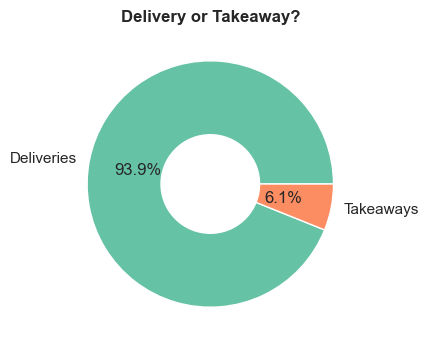

In [618]:
# It's obvious that # PURCHASE_COUNT = PURCHASE_COUNT_DELIVERY + PURCHASE_COUNT_TAKEAWAY
n_deliveries = df['PURCHASE_COUNT_DELIVERY'].sum()
n_takeaways = df['PURCHASE_COUNT_TAKEAWAY'].sum()
print(f'Count of Deliveries: {n_deliveries}')
print(f'Count of Takeaways: {n_takeaways}')
print("")

labels = ['Deliveries', 'Takeaways']
sizes = [n_deliveries_perc, n_takeaways_perc]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2", len(sizes)),
        wedgeprops={'width': 0.6})  # This makes it a donut chart

plt.title('Delivery or Takeaway?', fontsize=12, fontweight='bold')
plt.show()

### 10. What device do users prefer in their orders? 

ios        9718
android    8431
web        3697
Name: PREFERRED_DEVICE, dtype: int64



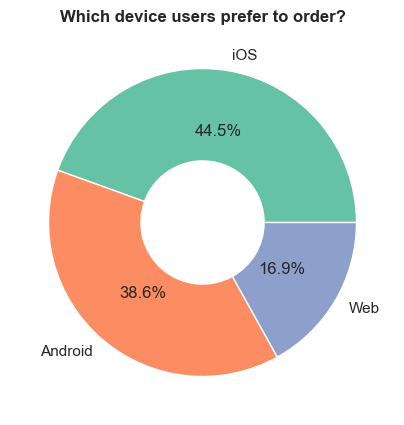

In [619]:
# PREFERRED_DEVICE
print(df['PREFERRED_DEVICE'].value_counts())
print("")

labels = ['iOS', 'Android', 'Web']

plt.figure(figsize=(5, 5))
plt.pie(df['PREFERRED_DEVICE'].value_counts().values
, labels=labels, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2", 3),
        wedgeprops={'width': 0.6})  

plt.title('Which device users prefer to order?', fontsize=12, fontweight='bold')
plt.show()

### 11. Where in the World Are Wolt Users?

In [620]:
# REGISTRATION_COUNTRY
print(df.REGISTRATION_COUNTRY.value_counts())

# Group the 'REGISTRATION_COUNTRY' feature in 4 groups
df['REGISTRATION_COUNTRY'] = np.where(df['REGISTRATION_COUNTRY'].isin(['FIN', 'DNK', 'GRC']), df['REGISTRATION_COUNTRY'], 'Other')
df['REGISTRATION_COUNTRY'].value_counts()

FIN    10261
DNK     8034
GRC     3040
USA       70
GBR       54
SWE       45
EST       44
DEU       39
NOR       34
ITA       24
POL       23
LTU       22
ESP       19
CZE       14
HUN       11
AUS       11
BEL       11
FRA       11
NLD       10
ISR        9
RUS        8
IND        7
LVA        7
BRA        7
IRL        7
CYP        7
CAN        6
ARE        6
JPN        6
QAT        6
PRT        5
ROU        5
HRV        5
AUT        5
CHE        4
SGP        4
FRO        3
SVK        3
CHN        3
TUR        2
LBN        2
JOR        2
CHL        2
UKR        2
ISL        2
COL        2
AZE        2
KOR        1
PHL        1
SAU        1
PAK        1
TWN        1
GEO        1
MEX        1
HKG        1
GIN        1
KWT        1
MLT        1
SVN        1
Name: REGISTRATION_COUNTRY, dtype: int64


FIN      10261
DNK       8034
GRC       3040
Other      583
Name: REGISTRATION_COUNTRY, dtype: int64

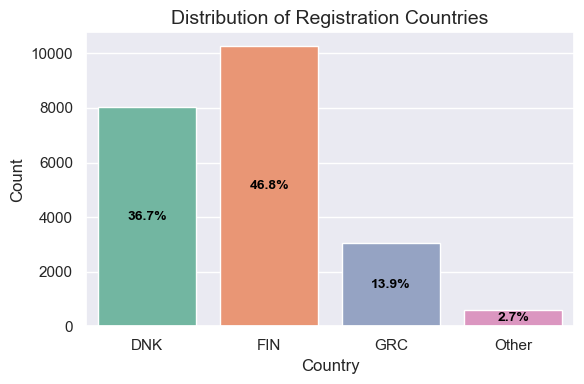

In [621]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='REGISTRATION_COUNTRY', data=df, palette='Set2')

plt.title('Distribution of Registration Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height / 2, f'{percentage:.1f}%', 
            ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

### 12. Trends in Meal Purchases

In [622]:
n_breakfasts = df['BREAKFAST_PURCHASES'].sum()
n_lunches = df['LUNCH_PURCHASES'].sum()
n_evenings = df['EVENING_PURCHASES'].sum()
n_dinners = df['DINNER_PURCHASES'].sum()

sum = int(n_breakfasts+n_lunches+n_evenings+n_dinners)
print('Sum of Food Orders: ' + str(sum))
print('Total Purchases: ' + str(total_purchases))

Sum of Food Orders: 73078
Total Purchases: 73351


In [624]:
df[(df['BREAKFAST_PURCHASES']==0) & (df['LUNCH_PURCHASES']==0) & (df['EVENING_PURCHASES']==0) & (df['DINNER_PURCHASES']==0)].shape[0]

25

In general, the sum of these 4 features is the total purchases. However, there are 25 customers who didn't choose these categories.

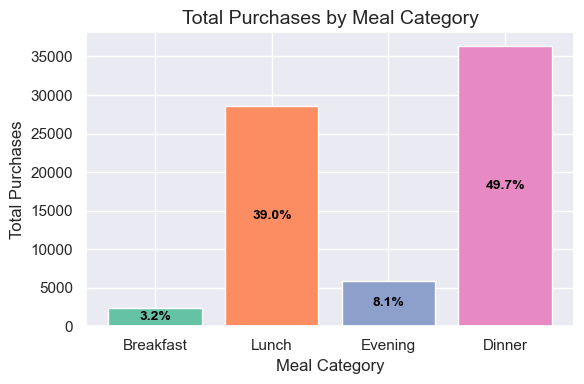

In [625]:
categories = ['Breakfast', 'Lunch', 'Evening', 'Dinner']
totals = [n_breakfasts, n_lunches, n_evenings, n_dinners]

percentages = [(total / sum) * 100 for total in totals]

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, totals, color=sns.color_palette("Set2", 4))

plt.title('Total Purchases by Meal Category', fontsize=14)
plt.xlabel('Meal Category', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)

for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{percentage:.1f}%', 
             ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

## Multivariate Analysis

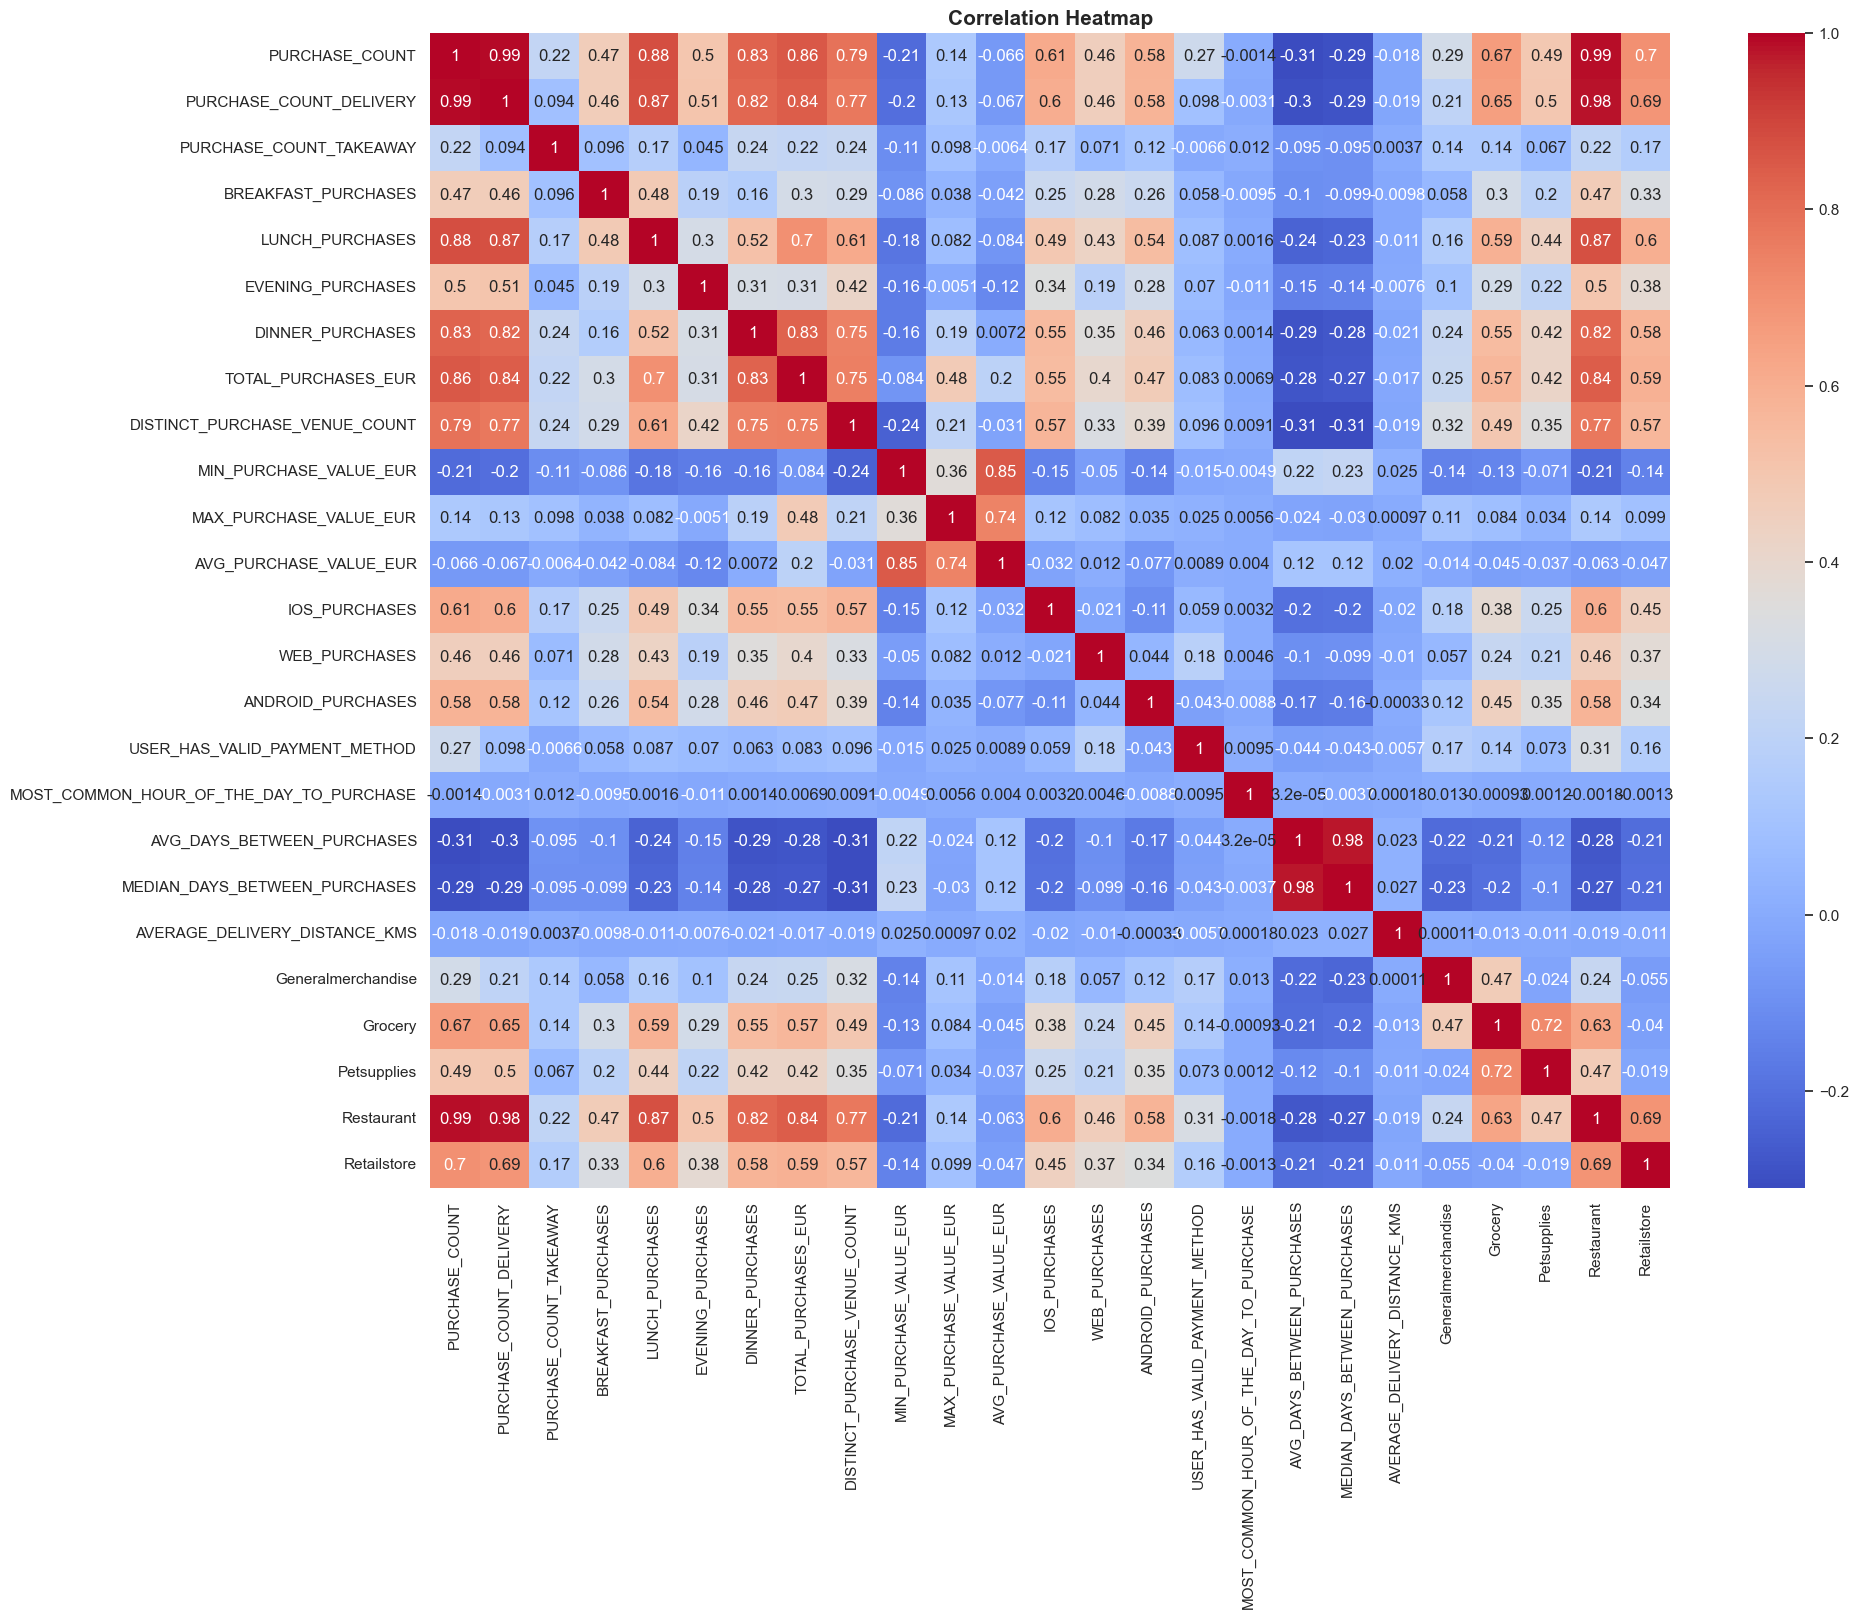

In [626]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold')
plt.show()

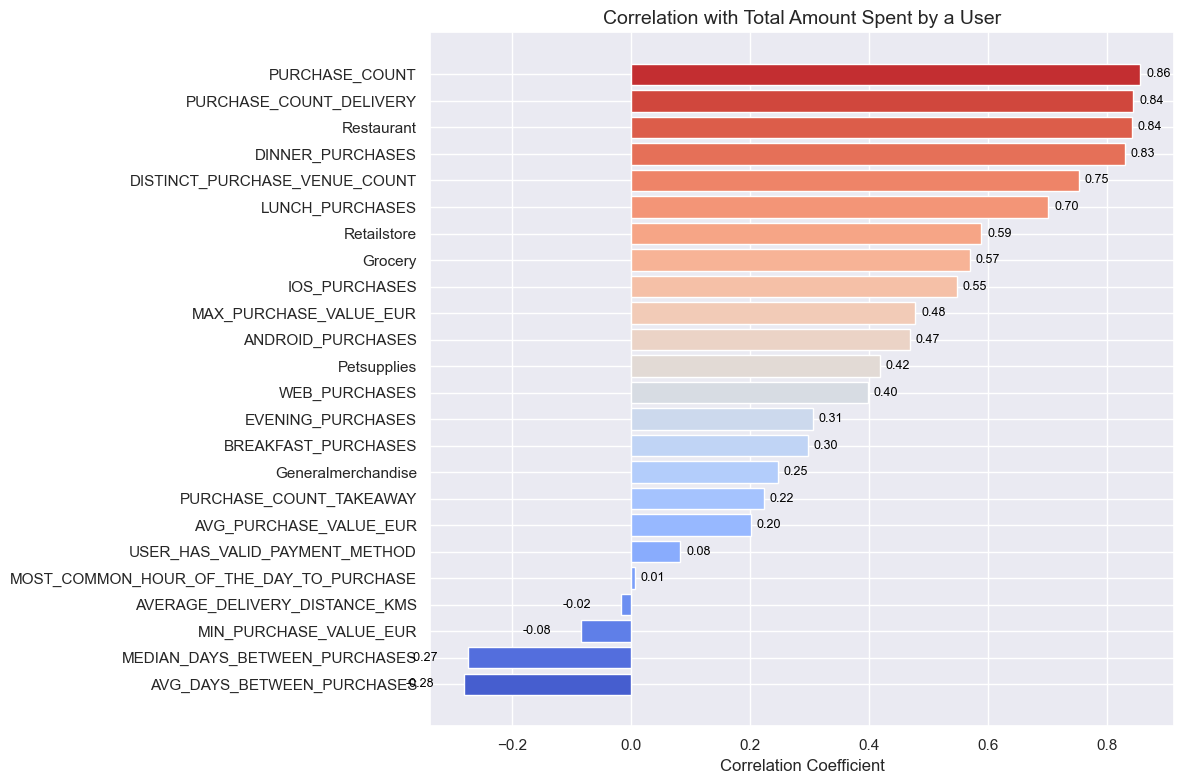

In [627]:
correlations = df.corr(numeric_only=True)['TOTAL_PURCHASES_EUR'].drop('TOTAL_PURCHASES_EUR').sort_values()
palette = sns.color_palette("coolwarm", len(correlations))

plt.figure(figsize=(12, 8))
bars = plt.barh(correlations.index, correlations.values, color=palette)

plt.title('Correlation with Total Amount Spent by a User', fontsize=14)
plt.xlabel('Correlation Coefficient')

for index, value in enumerate(correlations):
    plt.text(value + 0.01 if value > 0 else value - 0.05, index, f'{value:.2f}', 
             va='center', ha='left' if value > 0 else 'right', fontsize=9, color='black')

plt.tight_layout()
plt.show()

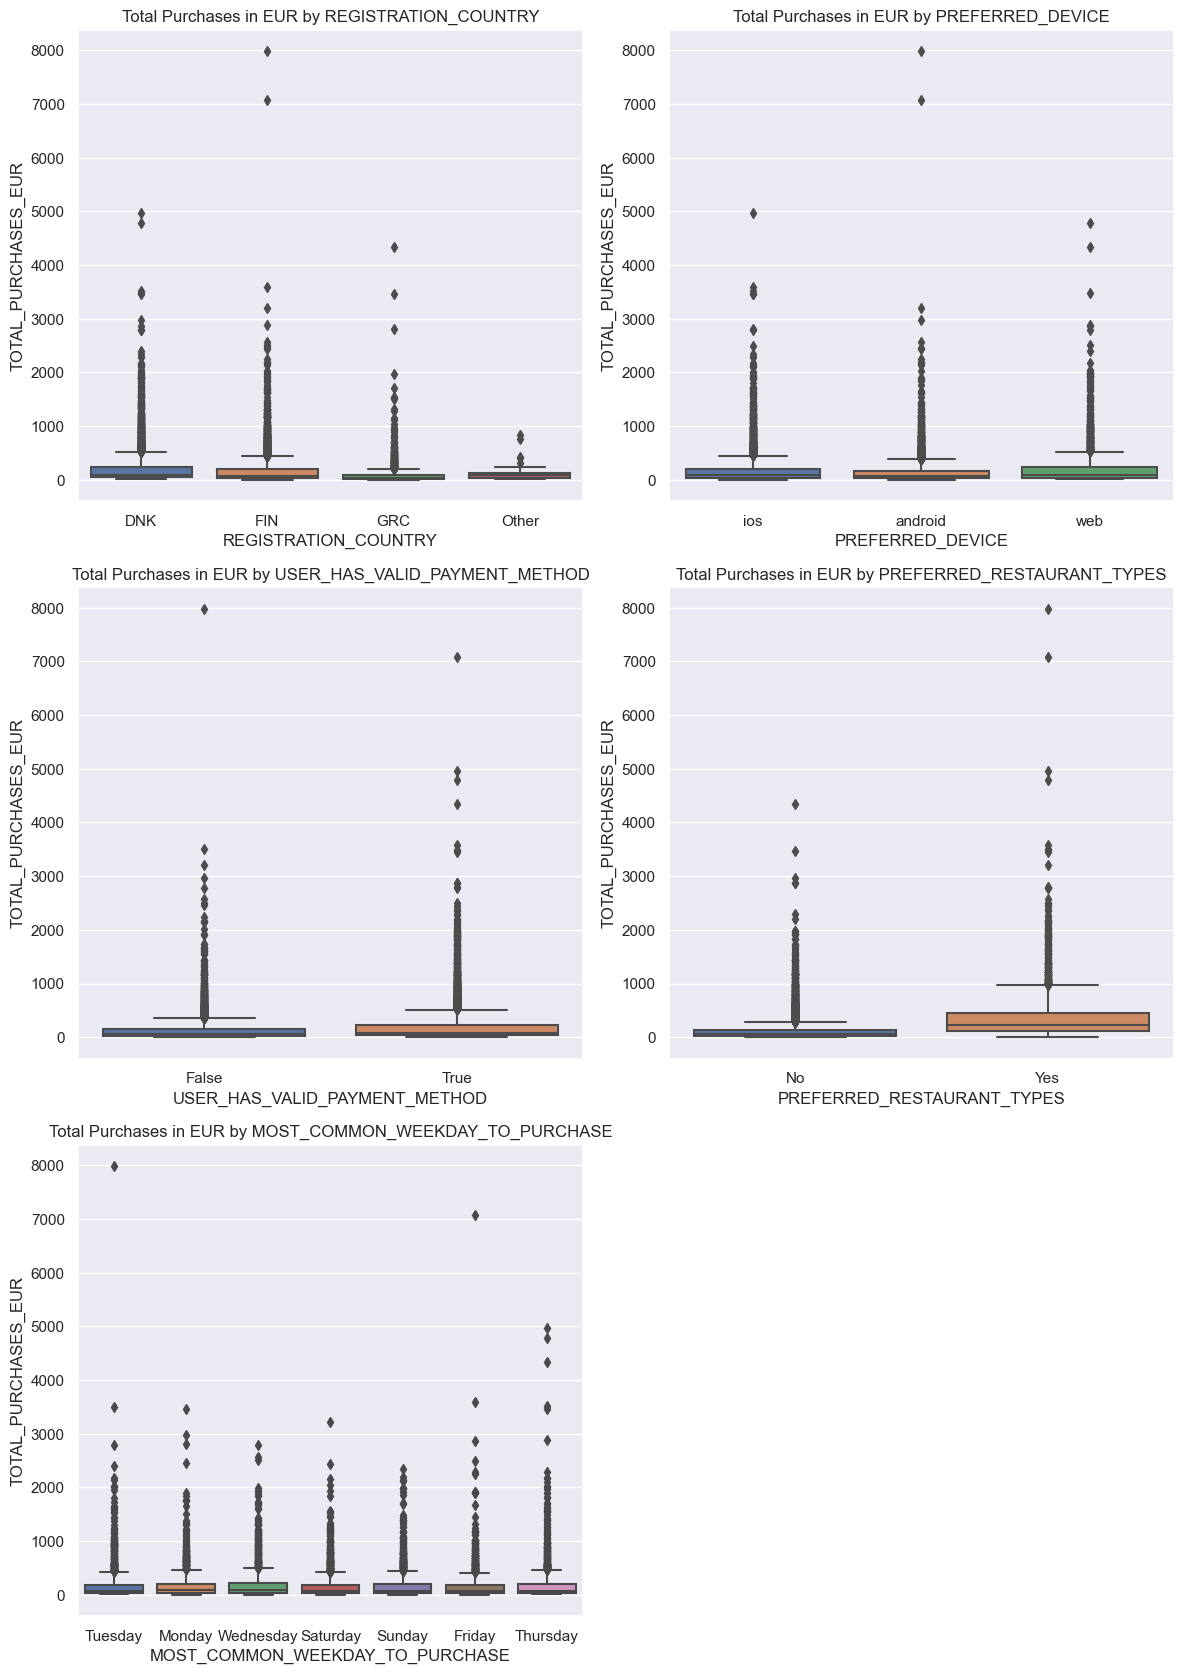

In [629]:
# Discrete Variables
discrete = ['REGISTRATION_COUNTRY', 'PREFERRED_DEVICE', 'USER_HAS_VALID_PAYMENT_METHOD', 
 'PREFERRED_RESTAURANT_TYPES', 'MOST_COMMON_WEEKDAY_TO_PURCHASE']

plt.figure(figsize=(12,22))
for i, col in enumerate(discrete, 1):
    plt.subplot(4,2,i)
    sns.boxplot(x=df[col], y=df['TOTAL_PURCHASES_EUR'])
    plt.title(f'Total Purchases in EUR by {col}')
plt.tight_layout()
plt.show()

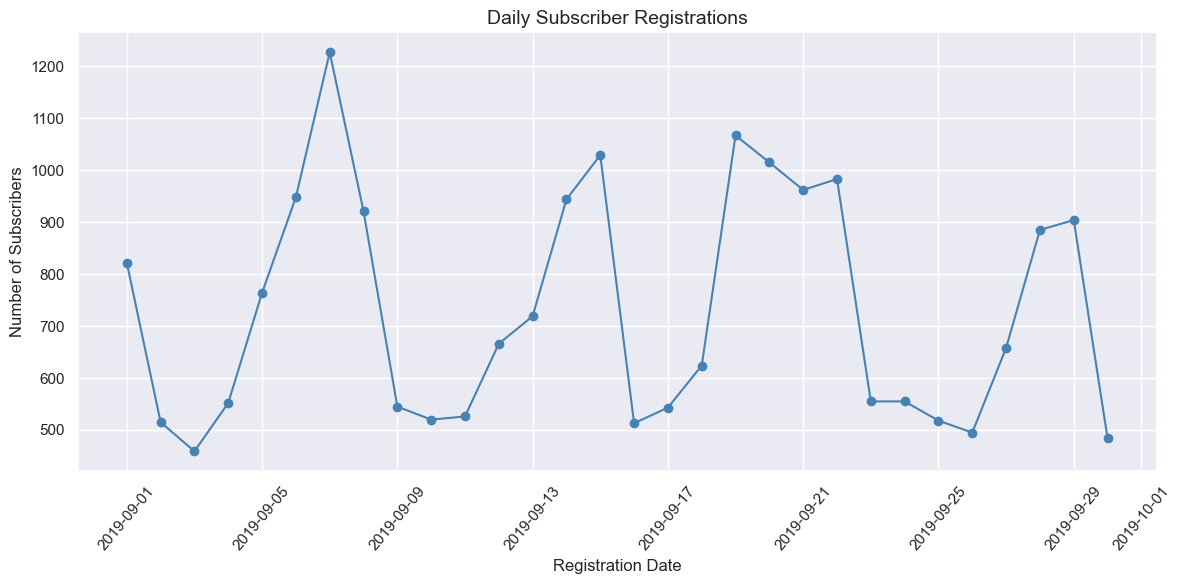

In [630]:
daily_counts = df['REGISTRATION_DATE'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', color='steelblue')

plt.title('Daily Subscriber Registrations', fontsize=14)
plt.xlabel('Registration Date')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=50)
plt.tight_layout()
plt.grid(True)

plt.show()

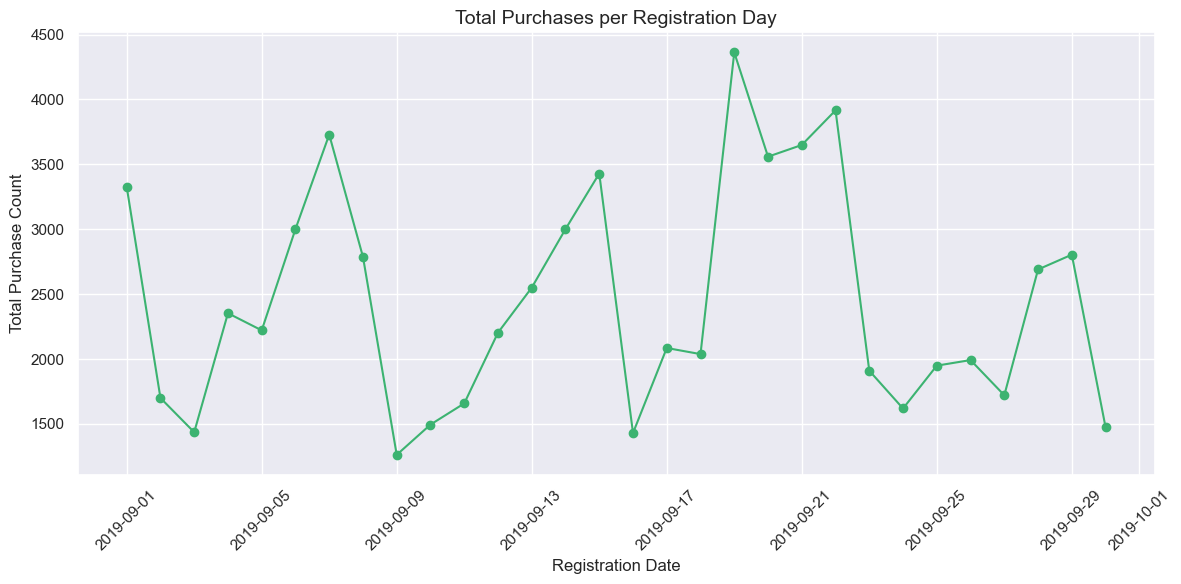

In [632]:
daily_purchases = df.groupby('REGISTRATION_DATE')['PURCHASE_COUNT'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_purchases.index, daily_purchases.values, marker='o', color='mediumseagreen')

plt.title('Total Purchases per Registration Day', fontsize=14)
plt.xlabel('Registration Date')
plt.ylabel('Total Purchase Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## Metrics

In [633]:
# AVERAGE NUMBER OF SUBSCRIBERS IN A DAY
df['REGISTRATION_DATE'].value_counts().sort_index().values.mean()

730.6

In [634]:
# AVERAGE DAILY ORDERS
daily_purchases = df.groupby('REGISTRATION_DATE')['PURCHASE_COUNT'].sum().sort_index()
daily_purchases.values.mean().round(2)

2445.03

In [635]:
# AVERAGE DAILY TOTAL INCOME (EUR)
daily_purchases = df.groupby('REGISTRATION_DATE')['TOTAL_PURCHASES_EUR'].sum().sort_index()
daily_purchases.values.mean().round(2)

70376.5

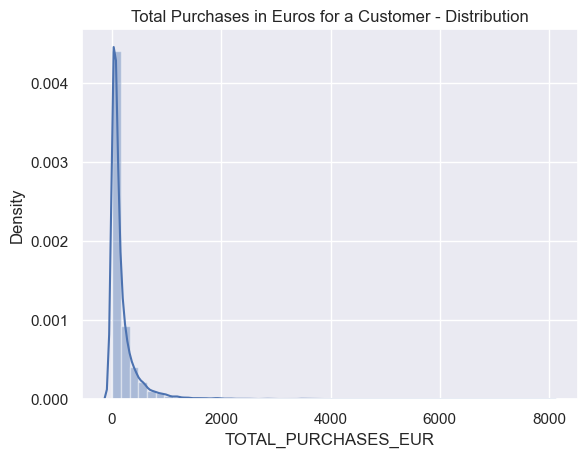

In [636]:
sns.distplot(df['TOTAL_PURCHASES_EUR'])
plt.title('Total Purchases in Euros for a Customer - Distribution')
plt.show()

In [637]:
df['TOTAL_PURCHASES_EUR'].describe()

count    11963.000000
mean       176.485423
std        299.577080
min          1.012000
25%         32.384000
50%         75.900000
75%        196.328000
max       7979.620000
Name: TOTAL_PURCHASES_EUR, dtype: float64

We will divide the distribution of the feature `TOTAL_PURCHASES_EUR` in three equal parts and then we will classify the customers based on which part they belong. Customers who are in the left side of the distribution are in the category 'Low Spender'. Those who are in the middle will be classified as 'Regular' and those who are in the right part will be the 'Premium' customers.  
Users who have never ordered from Wolt will be classified as 'Low Spender' by default.

In [638]:
q1 = df['TOTAL_PURCHASES_EUR'].quantile(0.33)
q2 = df['TOTAL_PURCHASES_EUR'].quantile(0.66)

print(f'Low Spenders Range: [0,{q1:.2f}]')
print(f'Regular Customers Range: [{q1:.2f},{q2:.2f}]')
print(f'Premium Customers Range: [{q2:.2f}, {np.max(df["TOTAL_PURCHASES_EUR"]):.2f}]')

Low Spenders Range: [0,42.50]
Regular Customers Range: [42.50,135.61]
Premium Customers Range: [135.61, 7979.62]


In [639]:
conditions = [
    (df['TOTAL_PURCHASES_EUR'] < q1),  # Low Spender
    (df['TOTAL_PURCHASES_EUR'] >= q1) & (df['TOTAL_PURCHASES_EUR'] < q2),  # Mid Spender
    (df['TOTAL_PURCHASES_EUR'] >= q2)  # High Spender
]

choices = ['Low Spender', 'Regular', 'Premium']

df['SPEND_TIER'] = np.select(conditions, choices, default='Inactive')

In [640]:
df['SPEND_TIER'].value_counts()

Inactive       9955
Premium        4074
Regular        3978
Low Spender    3911
Name: SPEND_TIER, dtype: int64

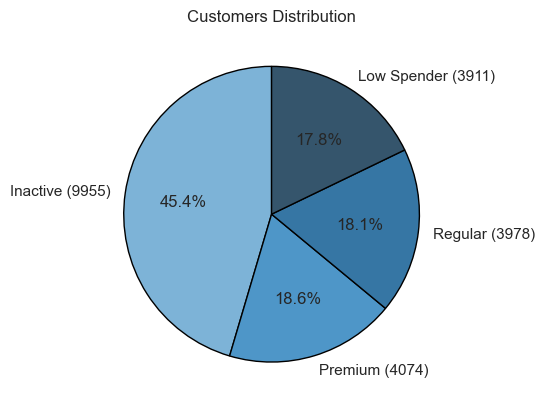

In [641]:
spend_counts = df['SPEND_TIER'].value_counts()

labels = [f'{i} ({count})' for i, count in spend_counts.items()]
plt.pie(spend_counts, labels=labels, startangle=90, colors=sns.color_palette("Blues_d", len(spend_counts)),
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Customers Distribution')
plt.show()